In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [3]:
data=pd.read_csv('Loan payments data.csv')

In [4]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [6]:
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [7]:
data.shape

(500, 11)

In [8]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [9]:
for col in data.columns:
    print(col)

Loan_ID
loan_status
Principal
terms
effective_date
due_date
paid_off_time
past_due_days
age
education
Gender


In [10]:
data=data.rename(columns={'Loan_ID':'Loan_Id','loan_status':'Loan_Status','Principal':'Principal',
                          'terms':'Terms','effective_date':'Effective_Date','due_date':'Due_Date',
                          'paid_off_time':'Paid_Of_Time','past_due_days':'Past_Due_Days','age':'Age',
                          'education':'Education','Gender':'Gender'})
for col in data.columns:
    print(col)

Loan_Id
Loan_Status
Principal
Terms
Effective_Date
Due_Date
Paid_Of_Time
Past_Due_Days
Age
Education
Gender


In [11]:
print(data.Loan_Id.isnull().sum())

0


In [12]:
print(data['Loan_Status'].value_counts(dropna=False))

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: Loan_Status, dtype: int64


In [13]:
print(data.Loan_Status.isnull().sum())

0


In [14]:
data.Principal.value_counts() 

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

In [16]:
print('Paidoff and principal all of them whatever\n')   
print(data.Principal.isnull().sum())
print(data.groupby('Loan_Status')['Principal'].value_counts()) 

Paidoff and principal all of them whatever

0
Loan_Status         Principal
COLLECTION          1000          77
                    800           23
COLLECTION_PAIDOFF  1000          80
                    800           19
                    500            1
PAIDOFF             1000         220
                    800           69
                    300            6
                    500            2
                    900            2
                    700            1
Name: Principal, dtype: int64


In [17]:
print(data.groupby('Loan_Status')['Principal'].sum()) 

Loan_Status
COLLECTION             95400
COLLECTION_PAIDOFF     95700
PAIDOFF               280500
Name: Principal, dtype: int64


In [18]:
print('Terms is missing value\n')
print(data.Terms.isnull().sum())
print('Terms value unique\n')
print(data.Terms.value_counts())
print('Unique Terms Value\n')
print(data.Terms.unique())


Terms is missing value

0
Terms value unique

30    272
15    207
7      21
Name: Terms, dtype: int64
Unique Terms Value

[30 15  7]


In [19]:
print('Age in Data state\n')
print('Data isnull sum\n')
print(data.Age.isnull().sum())
print('Data unique age\n')
print(data.Age.unique())
print('Data value counts age\n')
print(data.Age.value_counts())
print('Age group by Terms nad Principal in every Data\n')
print(data.groupby('Terms')['Age'].value_counts())
print('Group sum every Terms and Principal in Data')
print(data.groupby('Age')[['Terms','Principal']].sum())

Age in Data state

Data isnull sum

0
Data unique age

[45 50 33 27 28 35 29 36 26 39 40 32 43 25 34 31 37 24 21 30 22 44 46 38
 23 20 47 42 19 51 41 18 49]
Data value counts age

26    46
29    42
27    38
30    37
28    32
33    30
35    26
34    25
24    23
31    22
25    20
32    20
38    19
37    19
36    14
39    10
23    10
40     8
22     8
21     7
45     5
46     5
41     5
43     5
44     4
50     4
20     4
42     4
47     3
19     2
51     1
49     1
18     1
Name: Age, dtype: int64
Age group by Terms nad Principal in every Data

Terms  Age
7      29     4
       35     3
       25     2
       26     2
       27     2
             ..
30     44     2
       18     1
       46     1
       49     1
       50     1
Name: Age, Length: 72, dtype: int64
Group sum every Terms and Principal in Data
     Terms  Principal
Age                  
18      30       1000
19      60       2000
20     105       4000
21     195       6800
22     172       7300
23     202       8000
24     5

In [20]:
print('Education State\n')
print('Education Unique\n')
print(data.Education.unique())
print('Education isnull \n')
print(data.Education.isnull().sum())
print('Education value counts\n')
print(data.Education.value_counts())

Education State

Education Unique

['High School or Below' 'Bechalor' 'college' 'Master or Above']
Education isnull 

0
Education value counts

college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: Education, dtype: int64


In [22]:
print('Gender State\n')
print('Gender Unique\n')
print(data.Gender.unique())
print('Gender isnull\n')
print(data.Gender.isnull().sum())
print('Value Counts in Data\n')
print(data.Gender.value_counts())



Gender State

Gender Unique

['male' 'female']
Gender isnull

0
Value Counts in Data

male      423
female     77
Name: Gender, dtype: int64


# Data Cleaning

In [23]:
data=data.drop('Loan_Id',axis=1)

In [24]:
print(data.isnull().sum())
print('\n',  len(data))

Loan_Status         0
Principal           0
Terms               0
Effective_Date      0
Due_Date            0
Paid_Of_Time      100
Past_Due_Days     300
Age                 0
Education           0
Gender              0
dtype: int64

 500


In [25]:
data=data.drop(['Paid_Of_Time','Past_Due_Days'],axis=1)
#it is necessary to delete those values because Paid_Of_Time and Past_Due_Days property 
#values are quite missing.

In [26]:
data.isnull().sum()

Loan_Status       0
Principal         0
Terms             0
Effective_Date    0
Due_Date          0
Age               0
Education         0
Gender            0
dtype: int64

# Data Visulization

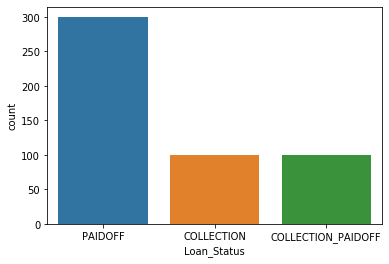

In [27]:
sns.countplot(data['Loan_Status'])
plt.show()

In [28]:
data['Loan_Status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

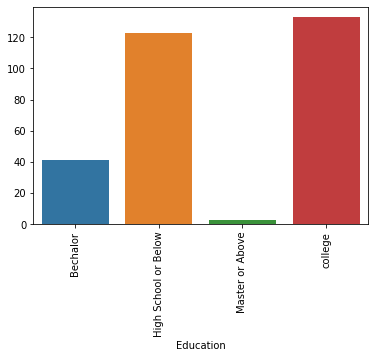

In [30]:
sns.barplot(x=data[data['Loan_Status']=='PAIDOFF'].groupby('Education')['Gender'].count().index,
           y=data[data['Loan_Status']=='PAIDOFF'].groupby('Education')['Gender'].count().values)
plt.xticks(rotation=90)
plt.show()

In [31]:
data[data['Loan_Status']=='PAIDOFF'].groupby('Education')['Gender'].count()

Education
Bechalor                 41
High School or Below    123
Master or Above           3
college                 133
Name: Gender, dtype: int64

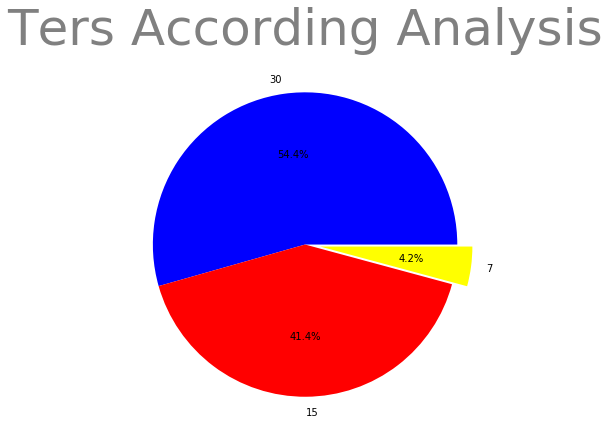

In [39]:
labels=data['Terms'].value_counts().index
colors=['blue','red','yellow']
explode=[0,0,0.1]
values=data['Terms'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Ters According Analysis',color='gray',fontsize=50)
plt.show()

In [40]:
features = ['Principal','terms','age','education','Gender','past_due_days']


In [41]:
loan_data = pd.read_csv('Loan payments data.csv')

In [42]:
#Filling zero instead of NAN in past_due_days column
loan_data['past_due_days'] = loan_data['past_due_days'].fillna(0).astype(int)

In [43]:
X = loan_data[features]
y = loan_data['loan_status']

In [47]:
#Converting Categorical features - Education and Gender into dummy variable
X = pd.get_dummies(X)

In [48]:
#creating training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [49]:
##Creating baseline or dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

clf_d = DummyClassifier(strategy='most_frequent', random_state=0)
clf_d.fit(X_train, y_train)

print('Train Accurancy = ',accuracy_score(y_train,clf_d.predict(X_train)))
print('Test Accurancy  = ',accuracy_score(y_test,clf_d.predict(X_test)))

Train Accurancy =  0.6053333333333333
Test Accurancy  =  0.584


# SVC modelling

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC 
import sklearn.metrics as skm

clf = SVC(kernel='linear', C = 1.0)

svm = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Train Accurancy = ',accuracy_score(y_train,clf.predict(X_train)))
print('Test Accurancy  = ',accuracy_score(y_test,y_pred))

Train Accurancy =  0.984
Test Accurancy  =  0.976


# Decision Tree

In [51]:
from sklearn.ensemble import RandomForestClassifier

dt2 = RandomForestClassifier(n_estimators=20)
dt2.fit(X_train, y_train)

y_pred_dt2 = dt2.predict(X_test)

print('Train Accurancy = ',accuracy_score(y_train,dt2.predict(X_train)))
print('Test Accurancy  = ',accuracy_score(y_test,y_pred_dt2))

Train Accurancy =  1.0
Test Accurancy  =  0.984


# K nearest Neighbours

In [52]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=50)
kn_clf.fit(X_train, y_train)

print('Train Accurancy = ',accuracy_score(y_train,kn_clf.predict(X_train)))
print('Test Accurancy  = ',accuracy_score(y_test,kn_clf.predict(X_test)))

Train Accurancy =  0.7706666666666667
Test Accurancy  =  0.792
